Name: Ali Bugra Okkali

ID: 181101053

Course: BIL470

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from LR import LinearRegression

# Exploratory Data Analysis (EDA)

## Read Dataset

In [2]:
df = pd.read_csv("data.csv")

The Gender column in the dataset has been removed because we will make our estimations based on Height and Weight values.

In [3]:
del df['Gender']


## Dateset Summary

In [4]:
display(df)

,Height,Weight,Index
0,174,96,4
1,189,87,2
2,185,110,4
3,195,104,3
4,149,61,3
...,...,...,...
495,150,153,5
496,184,121,4
497,141,136,5
498,150,95,5


Summary of each features

In [5]:
print(df["Height"].describe())

count    500.000000
mean     169.944000
std       16.375261
min      140.000000
25%      156.000000
50%      170.500000
75%      184.000000
max      199.000000
Name: Height, dtype: float64


In [6]:
print(df["Weight"].describe())

count    500.000000
mean     106.000000
std       32.382607
min       50.000000
25%       80.000000
50%      106.000000
75%      136.000000
max      160.000000
Name: Weight, dtype: float64


Checking balance of dataset

5    198
4    130
2     69
3     68
1     22
0     13
Name: Index, dtype: int64

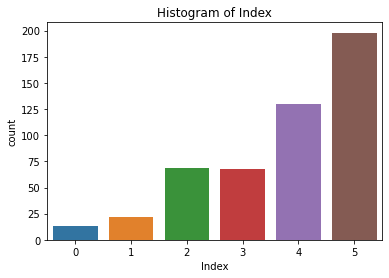

In [7]:
plt.title("Histogram of Index")
sns.countplot(df["Index"])
df['Index'].value_counts()

## Pair-plots for features

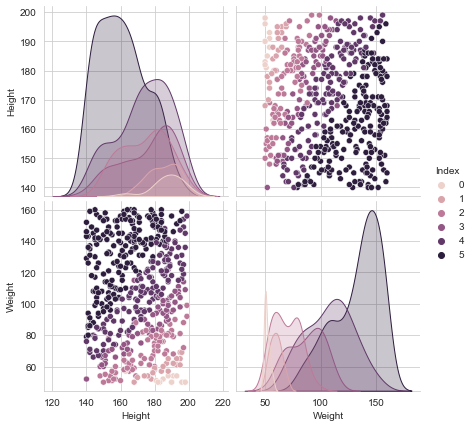

In [8]:
sns.set_style("whitegrid")
sns.pairplot(df, hue="Index", height=3)
plt.show()

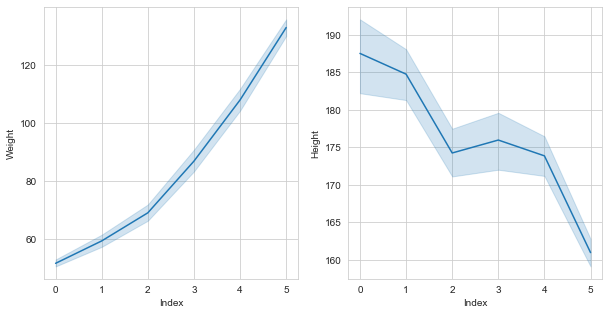

In [9]:
fig, ax= plt.subplots(1,2, figsize=(10,5))
sns.lineplot(df['Index'],df['Weight'], ax=ax[0])
sns.lineplot(df['Index'],df['Height'], ax=ax[1])
plt.show()

Distribution of data (height-weight) in 2-dimensional space

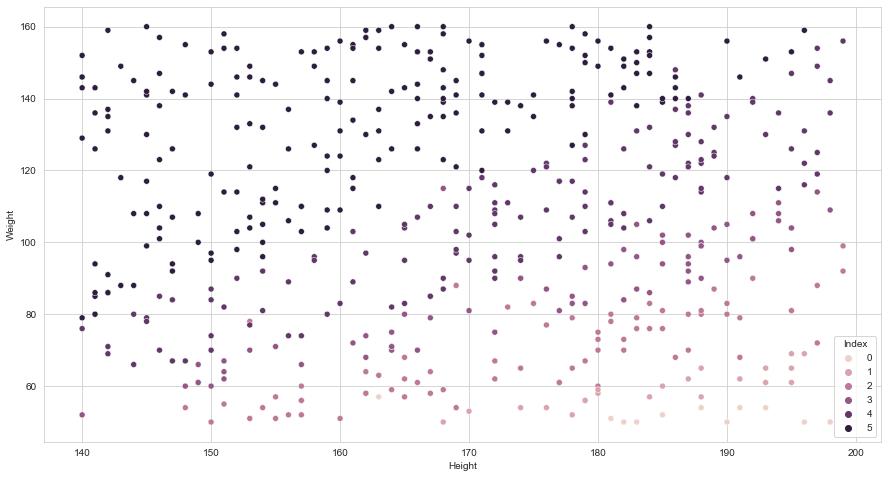

In [10]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Height', y='Weight', hue='Index', data=df)
plt.show()

## Correlations

Provides visual context for correlations via color scale

<AxesSubplot:>

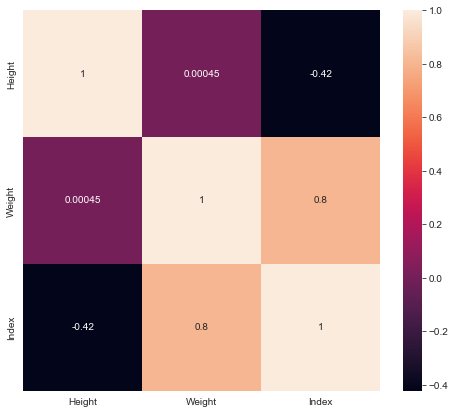

In [11]:
plt.rcParams['figure.figsize'] = (8, 7)
sns.heatmap(df.corr(), annot=True)

# Train the classifier

Create LinearRegression object with learning_rate and epoch.

In [12]:
lr = LinearRegression(learning_rate=0.000005, epoch=1000)

Split dataset to train and test (test_size=0.5)

In [13]:
X=df.values.tolist()
y=[]
for row in X:
    y.append(int(row[2]))
    del row[2]
X=pd.Series(X)
y=pd.Series(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)

X_train_list=X_train.values.tolist()
y_train_list=y_train.values.tolist()
X_test_list=X_test.values.tolist()
y_test_list=y_test.values.tolist()

## Training

In [14]:
lr.fit(X_train_list, y_train_list, X_test_list, y_test_list)

Initial m1:1 & initial m2:2 & initial b:0
Initial Loss:144690.984
After 1000 iterations, final b: -0.006600654396178892,final m1:-0.002256975500778752,final m2:0.03903468359479857
Final Loss: 0.6949621927747727


### Loss Change in Training

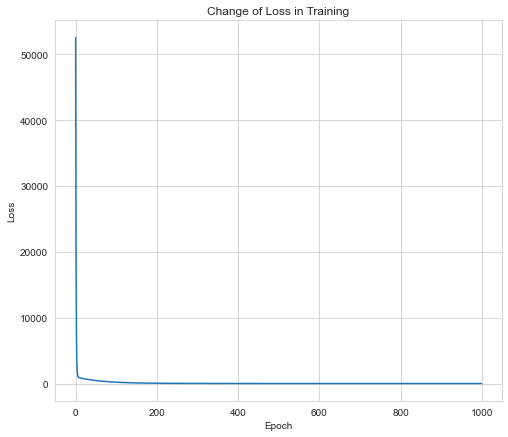

Some Train Loss Values
[52552.72842970147, 199.22132764328288, 39.62400574126004, 8.328529491394134, 2.191788317711504, 0.9884286353449991, 0.7524567356640208, 0.7061801036330785, 0.6971008553987295, 0.6953156498201402]


In [15]:
epoch=np.arange(0,1000)

plt.title("Change of Loss in Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(epoch, lr.train_loss)
plt.show()

print("Some Train Loss Values")
print(lr.train_loss[0:1000:100])

### Accuracy Change in Training 

I used mean absoulte error as an accuracy metric. You can observe the change in the chart below. Reducing this error means increasing accuracy.

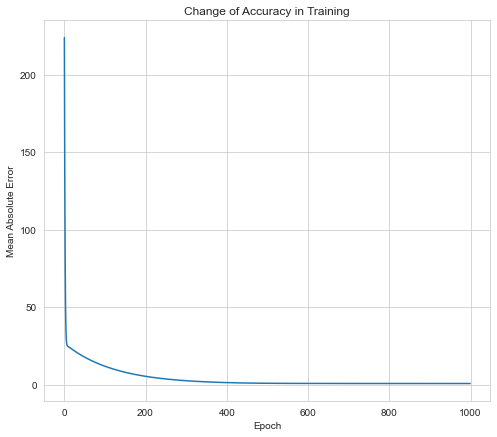

Some Train Accuracy Values
[223.83029286800007, 11.794584735252513, 5.296809614262217, 2.454566009608499, 1.2493890685200848, 0.8180724048470353, 0.718001985207796, 0.687820867889749, 0.6773222363144324, 0.6732535576098005]


In [16]:
plt.title("Change of Accuracy in Training")
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.plot(epoch, lr.train_accuracy)
plt.show()

print("Some Train Accuracy Values")
print(lr.train_accuracy[0:1000:100])


# Test the classifier

## Prediction

In [17]:
y_pred_list = lr.predict(X_test_list,y_test_list)
rounded_y_pred = [round(num) for num in y_pred_list]

print("Test Features Expected Classification")
print(y_test_list)
print("Prediction")
print(rounded_y_pred)

Test Features Expected Classification
[1, 2, 4, 5, 5, 2, 1, 5, 3, 5, 4, 4, 5, 4, 4, 3, 4, 5, 2, 4, 2, 3, 5, 4, 5, 5, 0, 5, 3, 2, 5, 1, 4, 5, 2, 2, 5, 2, 4, 5, 5, 3, 2, 4, 5, 5, 4, 4, 4, 4, 2, 4, 5, 4, 4, 5, 5, 4, 4, 5, 1, 3, 5, 3, 4, 5, 3, 5, 4, 5, 5, 4, 2, 5, 3, 5, 0, 5, 4, 5, 5, 4, 4, 4, 1, 1, 5, 4, 5, 4, 5, 4, 4, 3, 3, 0, 5, 5, 2, 1, 0, 5, 2, 3, 5, 5, 5, 5, 5, 5, 4, 2, 3, 5, 5, 5, 5, 2, 2, 2, 5, 5, 5, 3, 4, 4, 2, 2, 4, 4, 5, 3, 4, 4, 1, 4, 2, 5, 2, 4, 3, 2, 5, 5, 5, 5, 3, 5, 2, 4, 5, 5, 1, 4, 4, 5, 4, 2, 5, 1, 4, 5, 5, 5, 2, 5, 5, 5, 2, 4, 5, 4, 4, 4, 4, 5, 1, 5, 2, 5, 2, 5, 2, 3, 1, 4, 4, 5, 5, 5, 5, 4, 4, 5, 4, 5, 5, 2, 4, 4, 4, 5, 3, 2, 3, 5, 2, 5, 3, 5, 2, 3, 5, 5, 5, 5, 5, 2, 5, 3, 4, 3, 5, 4, 4, 3, 3, 0, 5, 5, 2, 4, 5, 5, 2, 4, 5, 5, 3, 2, 5, 3, 4, 4, 0, 5, 5, 5, 2, 4]
Prediction
[2, 2, 5, 5, 6, 2, 2, 3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 5, 3, 4, 2, 2, 5, 4, 5, 4, 2, 6, 4, 3, 5, 2, 5, 4, 2, 2, 6, 3, 3, 5, 5, 3, 3, 4, 5, 5, 4, 3, 3, 4, 2, 5, 5, 5, 5, 4, 5, 3, 5, 5, 2, 2, 6, 2, 4, 6, 2

### Loss Change in Test

The loss was found during the train phase.

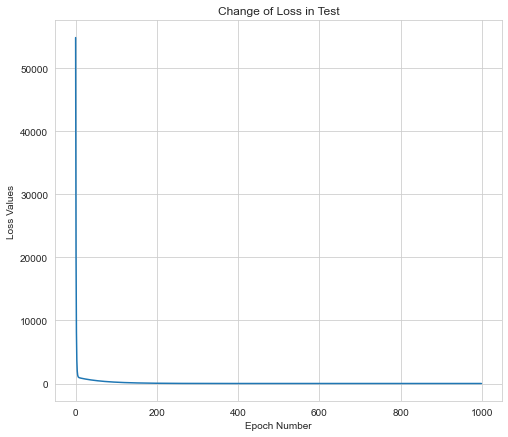

Some Test Loss Values
[54899.1153954771, 205.96071899051074, 40.7630647183184, 8.417943820640492, 2.0968667982351574, 0.8668771593194197, 0.6298979655153638, 0.5852905204620537, 0.5773655723237102, 0.5761732793485604]


In [18]:
plt.title("Change of Loss in Test")
plt.xlabel("Epoch Number")
plt.ylabel("Loss Values")
plt.plot(epoch, lr.test_loss)
plt.show()

print("Some Test Loss Values")
print(lr.test_loss[0:1000:100])

### Accuracy Change in Test 

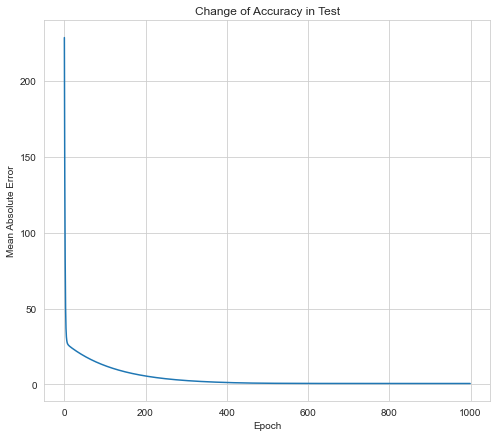

Some Test Accuracy Values
[228.51751793391992, 12.380152433099749, 5.5382204386028695, 2.5379946134949445, 1.2524593034511482, 0.7648159458989948, 0.6489290040121902, 0.6174186426973187, 0.6079265752104835, 0.6043448885676576]


In [19]:
plt.title("Change of Accuracy in Test")
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.plot(epoch, lr.test_accuracy)
plt.show()

print("Some Test Accuracy Values")
print(lr.test_accuracy[0:1000:100])

# Results

## R-Square

We find that the R-Square value is within the desired range.

In [20]:
corr_matrix = np.corrcoef(y_test_list, y_pred_list)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R-Square")
print(R_sq)

R-Square
0.7039263195232314


Let's compare the results of the predictor to the actual values using a plot.

<AxesSubplot:>

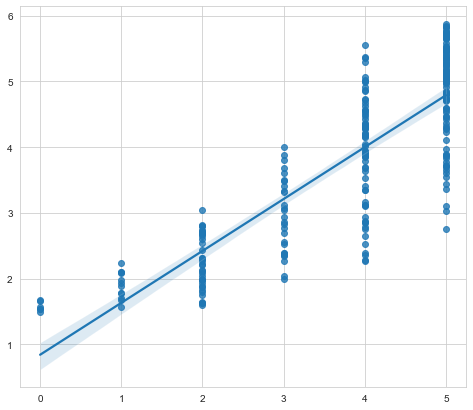

In [21]:
sns.regplot(x=y_test_list, y=y_pred_list)

## Conclusion


- When we examine the loss charts, we can see that there is a continuous decrease. So increasing the epoch contributed positively to our learning

- I used mean absolute error at each epoch for the accuracy calculation. 

- After all, I calculated accuracy using R-Square. The r-square value was around 0.7, which shows us that the regression is good.
